# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
tf.__version__

'2.2.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_excel('Folds5x2_pp.xlsx') #dataset is excel sheet type so read_excel
X = dataset.iloc[:, :-1].values
#features-- temperature, ambient pressure, relative humidity, exhaust vacuum
y = dataset.iloc[:, -1].values
#target--  Net hourly electrical energy output

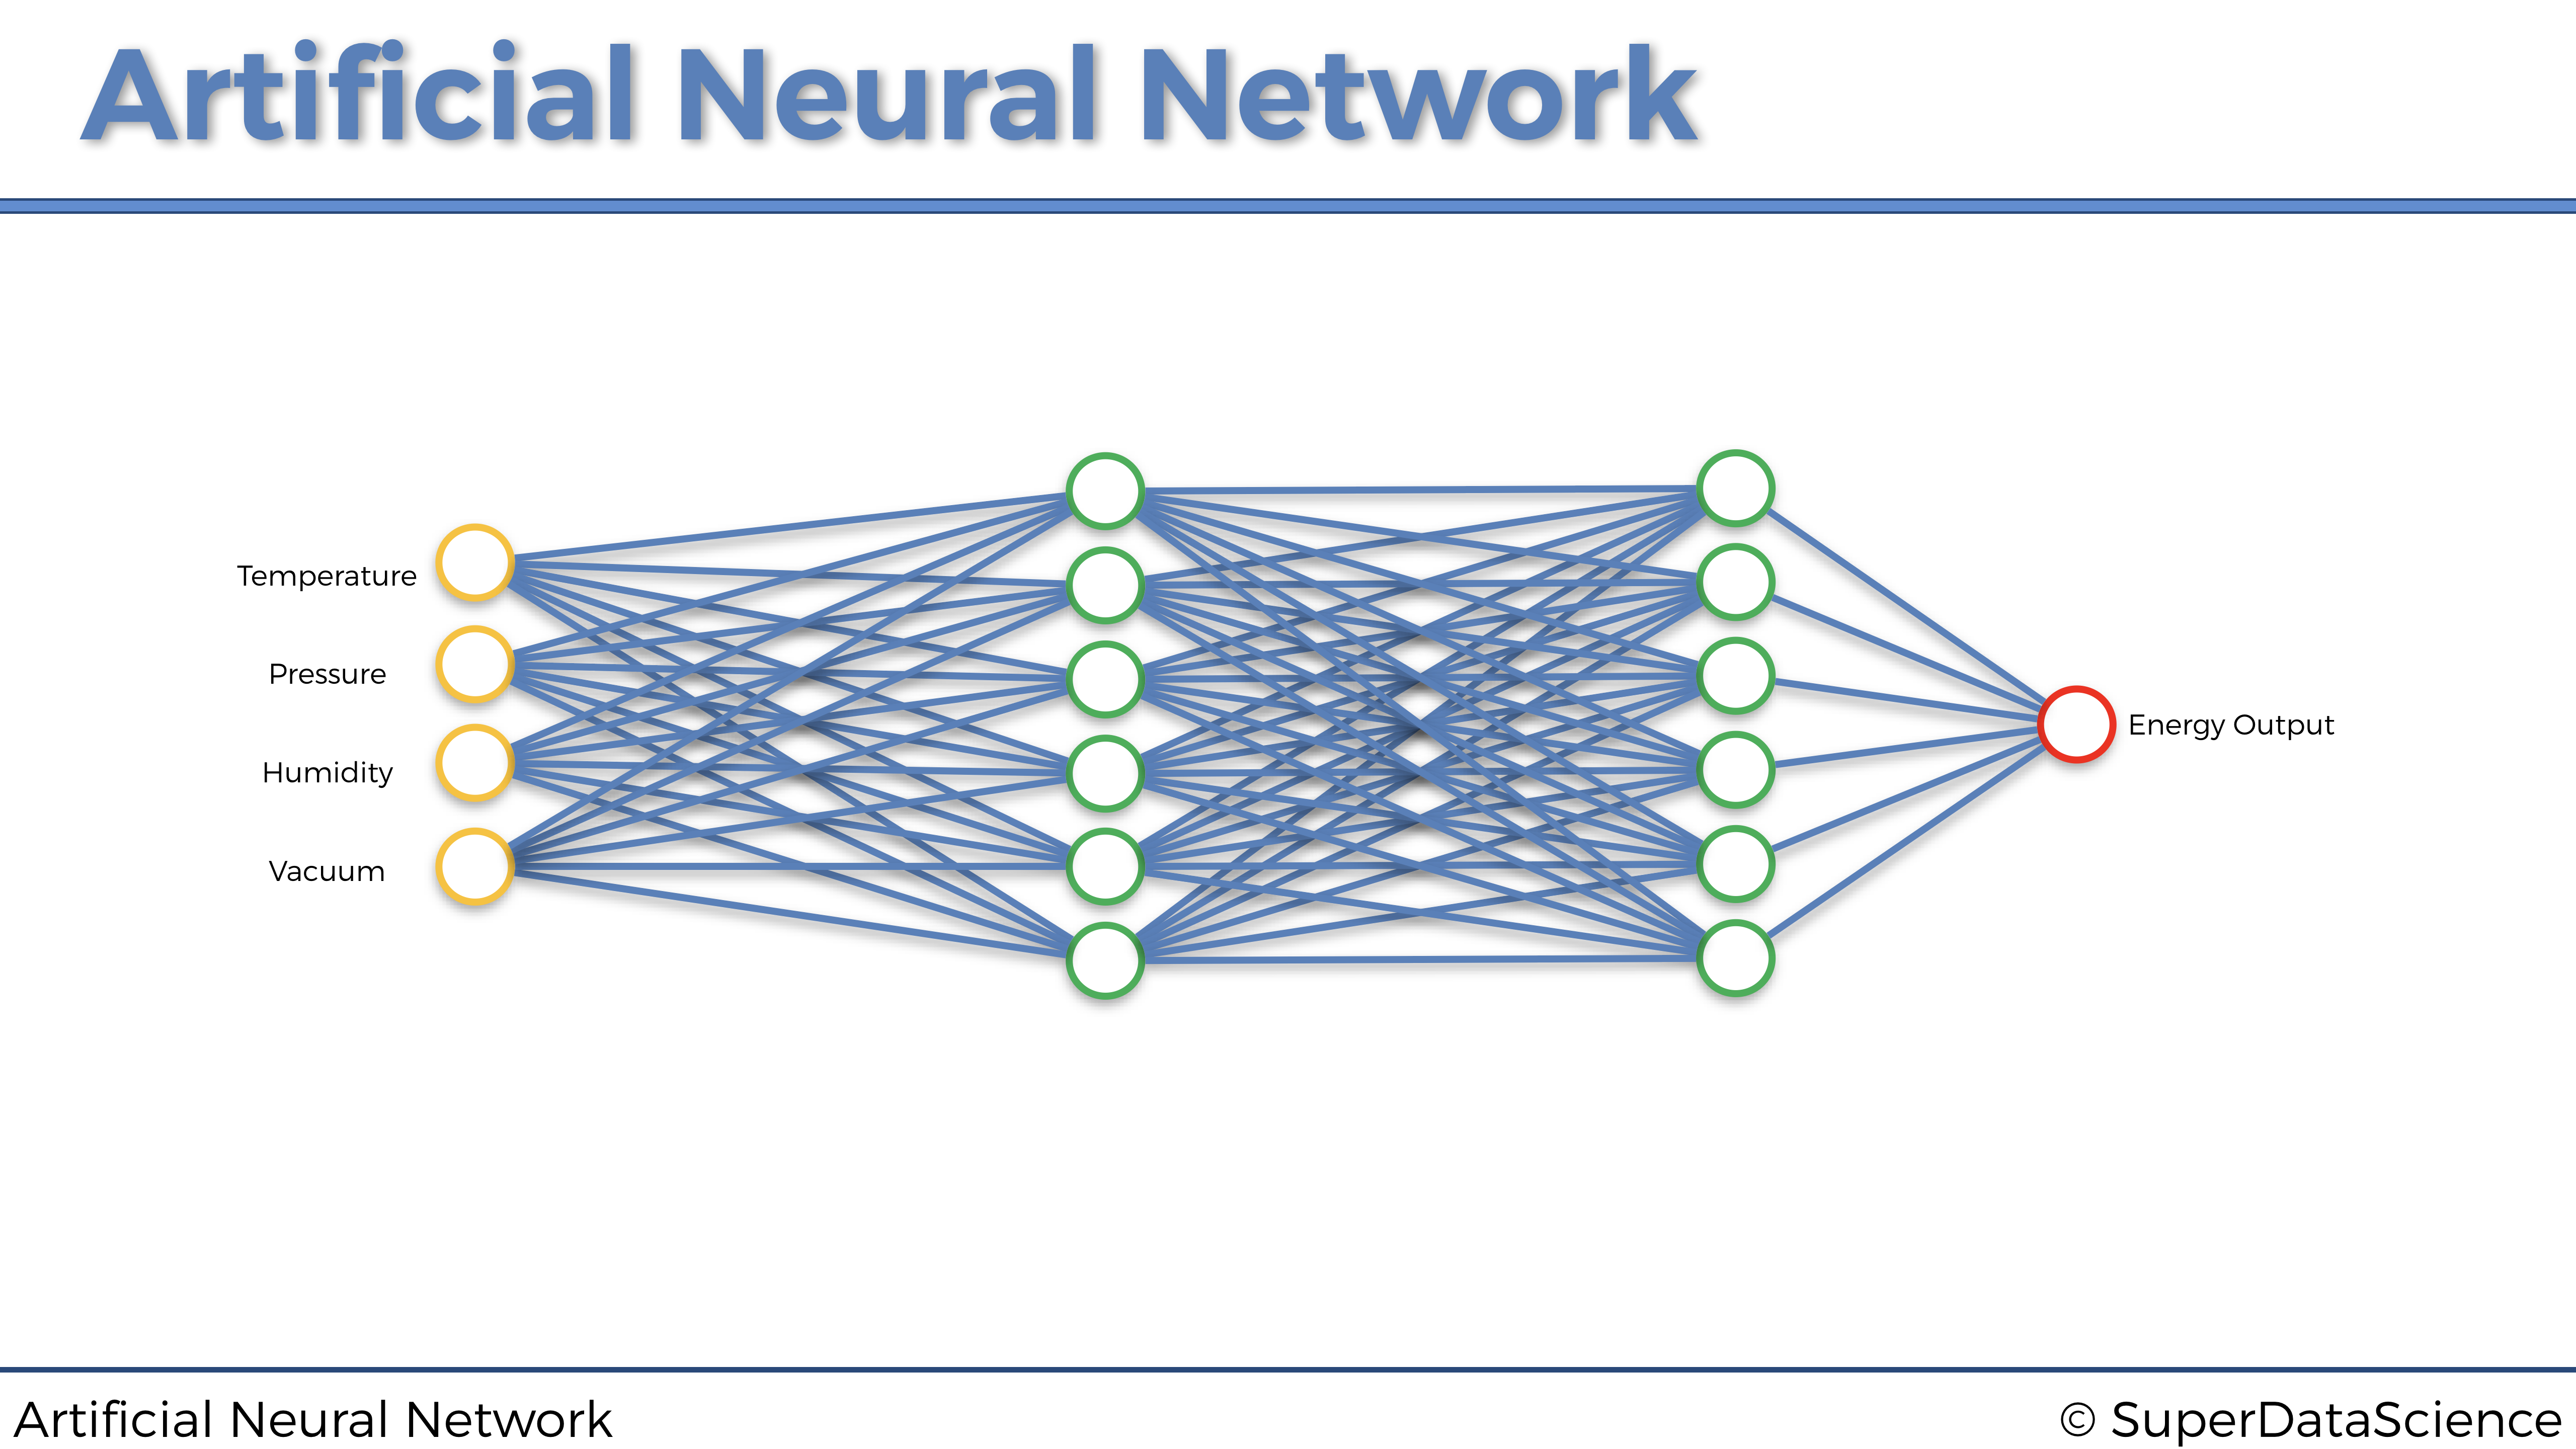

In [4]:
from IPython.display import Image
Image(filename='ANN_Architecture.PNG')

### Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
#no missing values in dataset and no catgorical data type
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform( X_train )
X_test = ss_X.transform( X_test )

## Part 2 - Building the ANN

### Initializing the ANN

In [7]:
ann = tf.keras.models.Sequential()
#Sequential class belongs to models module. Models module belongs to keras library of tensorflow package

### Adding the input layer and the first hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#add() function adds a layer within a neural network
#layers are created as objects of Dense class of layers module from keras library of tensorflow package 
#all input layer neurons are fully connected to all first hidden layer neurons-- Dense() class 
#units is the number of neurons in first hidden layer , input layer neurons will automatically be equal to number of features

### Adding the second hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#all first hidden layer neurons are fully connected to all second hidden layer neurons-- Dense() class 

### Adding the output layer

In [10]:
ann.add(tf.keras.layers.Dense(units=1))
#for output layer, always have sigmoid(binary target-0 or 1, y or n) or sortMax(classification between more than 2 categories)
#continuous target output --> no activation function

## Part 3 - Training the ANN

### Compiling the ANN

In [11]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
#compile() method is a function of Sequential() class being called by its object 'ann'
#loss function is the method for calculating the errors-- here we use SSE(sum squared errors mean in bacthes) for regression
#adam optimizer takes care of loss and fastens optimization(updates weights--backpropagate) by applying SGD algorithm 

### Training the ANN model on the Training set

In [12]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
#fit() method is a function of Sequential() class being called by its object 'ann'
#mini-batch gradient descent algorithm with b=32

Epoch 1/100
240/240 [==============================] - 0s 605us/step - loss: 204084.8906
Epoch 2/100
240/240 [==============================] - 0s 545us/step - loss: 190322.0625
Epoch 3/100
240/240 [==============================] - 0s 574us/step - loss: 154185.9844
Epoch 4/100
240/240 [==============================] - 0s 578us/step - loss: 105469.37500s - loss: 111719.87
Epoch 5/100
240/240 [==============================] - 0s 577us/step - loss: 68283.7344
Epoch 6/100
240/240 [==============================] - 0s 561us/step - loss: 46622.2109
Epoch 7/100
240/240 [==============================] - 0s 602us/step - loss: 30606.5469
Epoch 8/100
240/240 [==============================] - 0s 543us/step - loss: 17853.9473
Epoch 9/100
240/240 [==============================] - 0s 585us/step - loss: 12112.7021
Epoch 10/100
240/240 [==============================] - 0s 569us/step - loss: 8506.4775
Epoch 11/100
240/240 [==============================] - 0s 582us/step - loss: 5472.5396
Epoch 12

### Predicting the results of the Test set

In [13]:
y_pred = ann.predict(X_test)
#predict() method is a function of Sequential() class being called by its object 'ann'
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
#reshape pred and test vectors from horizontally to vertically for comparison using concatenate() function

[[431.94 431.23]
 [459.   460.01]
 [463.28 461.14]
 ...
 [469.94 473.26]
 [443.01 438.  ]
 [462.48 463.28]]
